In [354]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [355]:
data = pd.read_csv("data/target_v1.csv")
data.head()

,date,smp_max,smp_min,smp_mean,supply
0,2018-02-01,150.65,116.84,132.71,87.47
1,2018-02-02,163.86,116.84,134.19,86.64
2,2018-02-03,164.07,116.85,131.39,88.28
3,2018-02-04,171.00,115.76,131.89,86.14
4,2018-02-05,170.34,123.89,137.96,90.63


In [356]:
data.date = pd.to_datetime(data['date'])
data.index = data.date
data.drop('date', axis=1, inplace=True)

In [357]:
data.head()

,smp_max,smp_min,smp_mean,supply
date,,,,
2018-02-01,150.65,116.84,132.71,87.47
2018-02-02,163.86,116.84,134.19,86.64
2018-02-03,164.07,116.85,131.39,88.28
2018-02-04,171.00,115.76,131.89,86.14
2018-02-05,170.34,123.89,137.96,90.63


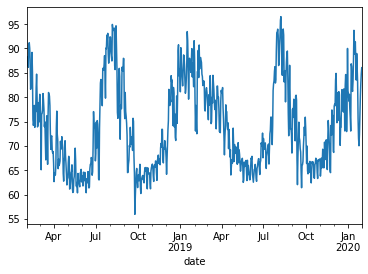

In [358]:
data.supply.plot()

In [359]:
data.iloc[0]

smp_max     150.65
smp_min     116.84
smp_mean    132.71
supply       87.47
Name: 2018-02-01 00:00:00, dtype: float64

In [360]:
# entire rage?
print("Entire range of date is: ",
      data.index[0], " to ", data.index[-1])

Entire range of date is:  2018-02-01 00:00:00  to  2020-01-31 00:00:00


In [361]:
data['2018']

,smp_max,smp_min,smp_mean,supply
date,,,,
2018-02-01,150.65,116.84,132.71,87.47
2018-02-02,163.86,116.84,134.19,86.64
2018-02-03,164.07,116.85,131.39,88.28
2018-02-04,171.00,115.76,131.89,86.14
2018-02-05,170.34,123.89,137.96,90.63
...,...,...,...,...
2018-12-27,208.27,161.88,174.74,89.53
2018-12-28,214.13,161.88,180.16,90.76
2018-12-29,209.51,152.53,171.66,86.13


In [362]:
target_supply = data.iloc[:, -1]
target_supply

date
2018-02-01    87.47
2018-02-02    86.64
2018-02-03    88.28
2018-02-04    86.14
2018-02-05    90.63
              ...  
2020-01-27    76.64
2020-01-28    80.25
2020-01-29    82.90
2020-01-30    84.85
2020-01-31    86.06
Name: supply, Length: 730, dtype: float64

In [363]:
rolling_num = 30

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling_num).mean()
    rolstd = timeseries.rolling(rolling_num).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

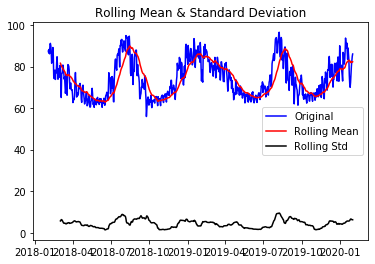

Results of Dickey-Fuller Test:
Test Statistic                  -2.450881
p-value                          0.127887
#Lags Used                      14.000000
Number of Observations Used    715.000000
Critical Value (1%)             -3.439529
Critical Value (5%)             -2.865591
Critical Value (10%)            -2.568927
dtype: float64


In [364]:
test_stationarity(target_supply)

## Time Series Stationary

1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

### Estimating & Eliminating Trend

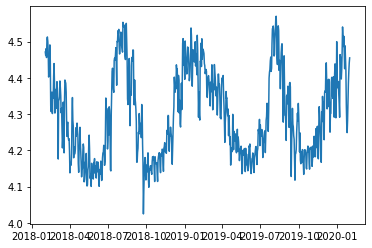

In [365]:
ts_log = np.log(target_supply)
plt.plot(ts_log)

1. Aggregation – taking average for a time period like monthly/weekly averages
2. Smoothing – taking rolling averages
3. Polynomial Fitting – fit a regression model

### Moving average

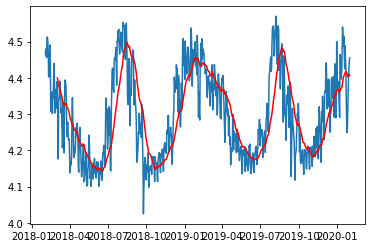

In [366]:
moving_avg = ts_log.rolling(rolling_num).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 30 values, rolling mean is not defined for first 11 values. This can be observed as:

In [367]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

date
2018-02-01        NaN
2018-02-02        NaN
2018-02-03        NaN
2018-02-04        NaN
2018-02-05        NaN
2018-02-06        NaN
2018-02-07        NaN
2018-02-08        NaN
2018-02-09        NaN
2018-02-10        NaN
2018-02-11        NaN
2018-02-12        NaN
2018-02-13        NaN
2018-02-14        NaN
2018-02-15        NaN
2018-02-16        NaN
2018-02-17        NaN
2018-02-18        NaN
2018-02-19        NaN
2018-02-20        NaN
2018-02-21        NaN
2018-02-22        NaN
2018-02-23        NaN
2018-02-24        NaN
2018-02-25        NaN
2018-02-26        NaN
2018-02-27        NaN
2018-02-28        NaN
2018-03-01        NaN
2018-03-02   -0.03058
Name: supply, dtype: float64

Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity.

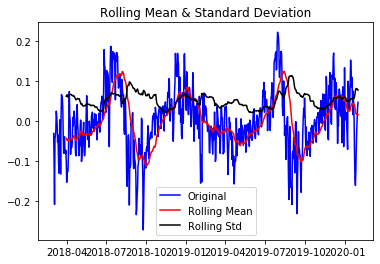

Results of Dickey-Fuller Test:
Test Statistic                  -3.133047
p-value                          0.024202
#Lags Used                      16.000000
Number of Observations Used    684.000000
Critical Value (1%)             -3.439947
Critical Value (5%)             -2.865775
Critical Value (10%)            -2.569025
dtype: float64


In [368]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. This can be implemented in Pancas as:

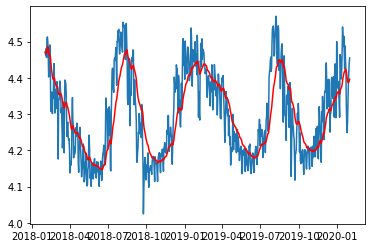

In [369]:
expwighted_avg = ts_log.ewm(span=rolling_num).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above. Now, let’s remove this from series and check stationarity:

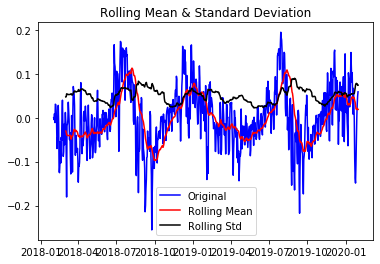

Results of Dickey-Fuller Test:
Test Statistic                  -2.923422
p-value                          0.042691
#Lags Used                      16.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (5%)             -2.865602
Critical Value (10%)            -2.568933
dtype: float64


In [370]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

### Eliminating Trend and Seasonality

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.

### Differencing

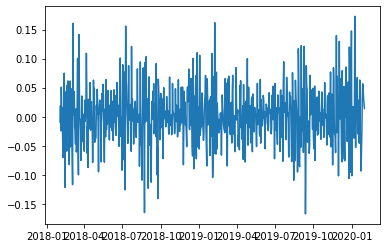

In [371]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

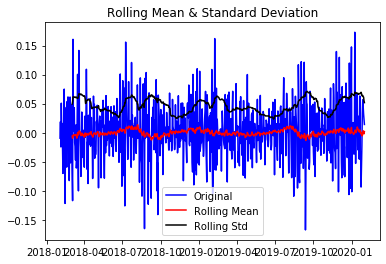

Results of Dickey-Fuller Test:
Test Statistic                  -5.086217
p-value                          0.000015
#Lags Used                      20.000000
Number of Observations Used    708.000000
Critical Value (1%)             -3.439620
Critical Value (5%)             -2.865631
Critical Value (10%)            -2.568948
dtype: float64


In [372]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing

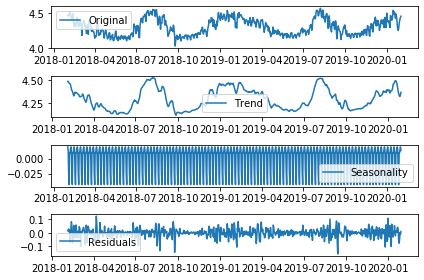

In [373]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

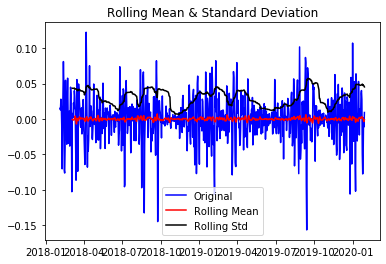

Results of Dickey-Fuller Test:
Test Statistic                -1.245534e+01
p-value                        3.501115e-23
#Lags Used                     1.800000e+01
Number of Observations Used    7.050000e+02
Critical Value (1%)           -3.439660e+00
Critical Value (5%)           -2.865648e+00
Critical Value (10%)          -2.568958e+00
dtype: float64


In [374]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### 5. Forecasting a Time Series

1. A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
2. A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

In [375]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

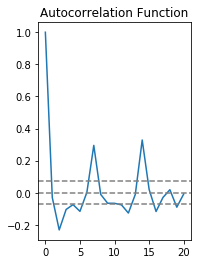

In [376]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

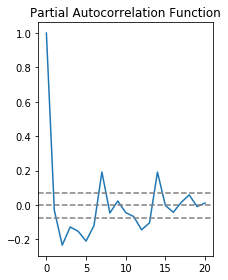

In [377]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [378]:
from statsmodels.tsa.arima_model import ARIMA

### AR Model

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5634')

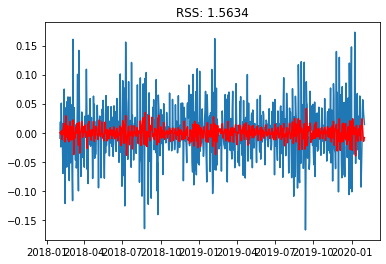

In [379]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5012')

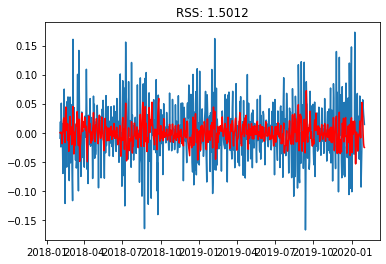

In [380]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\lonj7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4675')

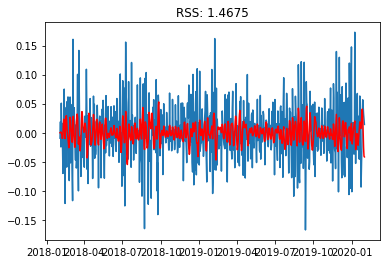

In [381]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Taking it back to original scale


In [393]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2018-02-02   -0.000053
2018-02-03    0.000173
2018-02-04    0.001194
2018-02-05   -0.000027
2018-02-06   -0.002392
dtype: float64

In [404]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2018-02-02   -0.000053
2018-02-03    0.000120
2018-02-04    0.001314
2018-02-05    0.001287
2018-02-06   -0.001105
dtype: float64

In [416]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2018-02-01    4.471296
2018-02-02    4.471243
2018-02-03    4.471416
2018-02-04    4.472610
2018-02-05    4.472583
dtype: float64

Text(0.5, 1.0, 'RMSE: 26.0104')

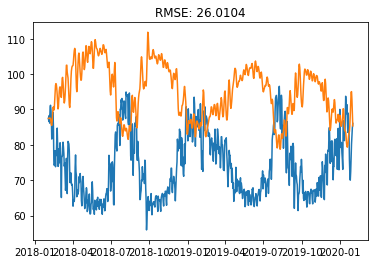

In [448]:

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(target_supply)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-target_supply)**2)/len(target_supply)))

In [511]:
a = predictions_ARIMA.copy()
a = -a
a = a -(a.min()) + target_supply.min() + 2

In [512]:
a = a*1.4 - 35

Text(0.5, 1.0, 'RMSE: 26.0104')

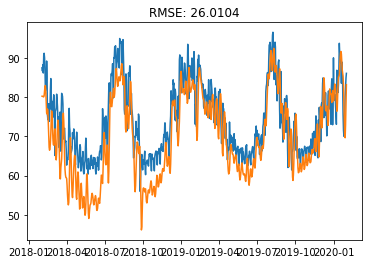

In [513]:
plt.plot(target_supply)
plt.plot(a)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-target_supply)**2)/len(target_supply)))